In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('heart_2020.csv')

In [3]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
data.shape

(319795, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
data.duplicated().any()

True

In [8]:
data[data.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [9]:
data=data.drop_duplicates()

In [10]:
data.duplicated().any()

False

In [11]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [12]:
data['HeartDisease'].value_counts()

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

In [13]:
Age={'18-24':21,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52,'55-59':57,'60-64':62,'65-69':67,'70-74':72,'75-79':77,'80 or older':80}
data['AgeCategory']=data['AgeCategory'].apply(lambda x:Age[x])
data['AgeCategory']=data['AgeCategory'].astype('int')

In [14]:
data.rename(columns={'AgeCategory':'Age'},inplace=True)

In [15]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Age,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42,White,No,Yes,Very good,8.0,No,No,No


In [16]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,Age,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,54.325964,7.084559
std,6.468134,8.140656,8.128288,17.814606,1.467122
min,12.020000,0.000000,0.000000,21.000000,1.000000
25%,24.030000,0.000000,0.000000,42.000000,6.000000
50%,27.410000,0.000000,0.000000,57.000000,7.000000
75%,31.650000,2.000000,4.000000,67.000000,8.000000
max,94.850000,30.000000,30.000000,80.000000,24.000000


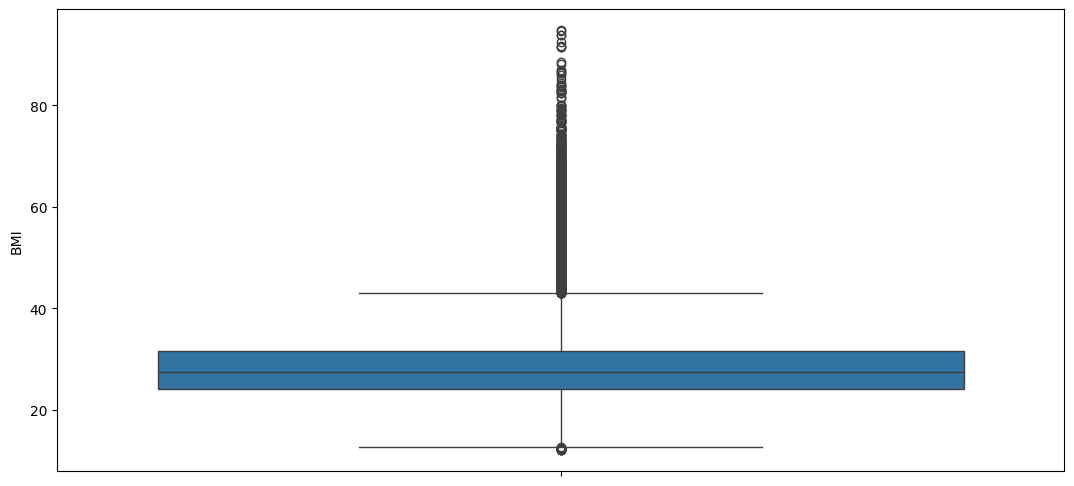

In [17]:
plt.figure(figsize=(13,6))
sns.boxplot(data['BMI'])
plt.show()

In [18]:
Q1=data.BMI.quantile(0.25)
Q3=data.BMI.quantile(0.75)
IQR=Q3-Q1
data=data[(data.BMI >= Q1-1.5*IQR)& (data.BMI <= Q3+ 1.5*IQR)]

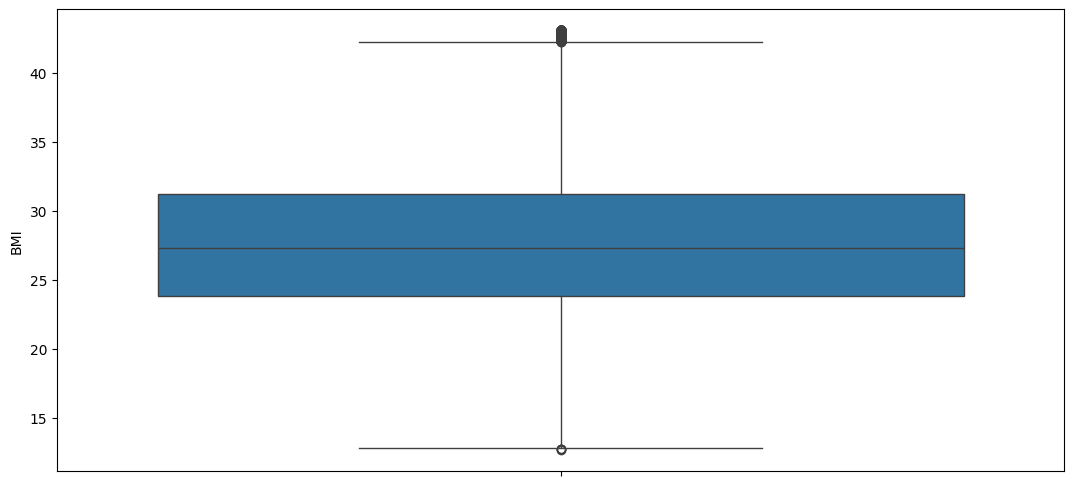

In [19]:
plt.figure(figsize=(13,6))
sns.boxplot(data['BMI'])
plt.show()

In [20]:
objList=data.select_dtypes(include="object").columns
print(objList)

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [21]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in objList:
    data[i]=le.fit_transform(data[i])


In [22]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Age,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42,5,0,1,4,8.0,0,0,0


In [23]:
data.shape

(292812, 18)

In [24]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Age', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [25]:
from sklearn.feature_selection import chi2
datanew=data[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Age', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer']]
y=data['HeartDisease']

In [26]:
f_score=chi2(datanew,y)

In [27]:
p_value=pd.Series(f_score[1],index=datanew.columns)
p_value=p_value.sort_values(ascending=True)
print(p_value)

Age                  0.000000e+00
Diabetic             0.000000e+00
KidneyDisease        0.000000e+00
DiffWalking          0.000000e+00
MentalHealth         0.000000e+00
SkinCancer           0.000000e+00
Stroke               0.000000e+00
Smoking              0.000000e+00
PhysicalHealth       0.000000e+00
Sex                 1.182382e-189
BMI                 3.168814e-165
PhysicalActivity    3.553746e-126
AlcoholDrinking      7.027044e-83
Asthma               4.083969e-64
Race                 3.631853e-44
GenHealth            3.872261e-11
SleepTime            9.345909e-04
dtype: float64


In [28]:
significance_level=0.05
for i in p_value.index:
    if p_value[i]<=significance_level:
        print(i,": RejectNULLH")
    else:
        print(i," :AcceptedNULLH")

Age : RejectNULLH
Diabetic : RejectNULLH
KidneyDisease : RejectNULLH
DiffWalking : RejectNULLH
MentalHealth : RejectNULLH
SkinCancer : RejectNULLH
Stroke : RejectNULLH
Smoking : RejectNULLH
PhysicalHealth : RejectNULLH
Sex : RejectNULLH
BMI : RejectNULLH
PhysicalActivity : RejectNULLH
AlcoholDrinking : RejectNULLH
Asthma : RejectNULLH
Race : RejectNULLH
GenHealth : RejectNULLH
SleepTime : RejectNULLH


In [29]:
x=data.drop('HeartDisease',axis=1)
y=data.HeartDisease

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
y_predictdt=dt.predict(x_test)

In [34]:
print("FOR DECSION TREE METHOD:  ")
print("Accuracy Score: ",accuracy_score(y_test,y_predictdt))
print("F1-Score: ",f1_score(y_test,y_predictdt))
print(classification_report(y_test,y_predictdt))

FOR DECSION TREE METHOD:  
Accuracy Score:  0.8566159520516367
F1-Score:  0.24562033959213006
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     53307
           1       0.23      0.26      0.25      5256

    accuracy                           0.86     58563
   macro avg       0.58      0.59      0.58     58563
weighted avg       0.86      0.86      0.86     58563



In [35]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_predictrf=rf.predict(x_test)

In [37]:
print("FOR RANDOMFOREST METHOD: ")
print("Accuracy score:",accuracy_score(y_test,y_predictrf))
print("F1-score:",f1_score(y_test,y_predictrf))
print(classification_report(y_test,y_predictrf))

FOR RANDOMFOREST METHOD: 
Accuracy score: 0.8995099294776565
F1-score: 0.16394374200880807
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     53307
           1       0.32      0.11      0.16      5256

    accuracy                           0.90     58563
   macro avg       0.62      0.54      0.56     58563
weighted avg       0.86      0.90      0.88     58563



In [38]:
svm_classifier = SVC()

In [ ]:
svm_classifier.fit(x_train, y_train)

In [ ]:
y_predictsvm=svm_classifier.predict(x_test)

In [ ]:
print("Support Vector Machines (SVM):")
print("Accuracy:", accuracy_score(y_test, y_predictsvm))
print("F1 Score:", f1_score(y_test, y_predictsvm))
print("Classification Report:\n", classification_report(y_test, y_predictsvm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predictsvm))